In [1]:
push!(LOAD_PATH, pwd());
using PyPlot, LinearAlgebra
# Package Revise is useful for the developpment of the code
# using Revise
using UOT, UOT_plot
PyPlot.svg(true);

In [2]:
# domain [0, 1] x [0, 1]
bounds = [[0.0, 0.0], [1.0, 1.0]];
# number of point sources
K = 10;

# support of first measure
x = [[0.5, 0.5]] .+ [.25*[cos(2*pi*t), sin(2*pi*t)] for t in collect(LinRange(0, 1, K+1))[1:end-1]];
# support of second measure
y = x + [0.02*randn(2) for i in 1:K];

n, m = length(x), length(y);
# weights
a, b = 1/n.*ones(n), 1/n.*ones(m);
a = 1/n.*ones(n);
b = a + 0.2*1/n*randn(n);

In [3]:
?UOT.compute_flat_metric

```
compute_flat_metric(x, y, a, b, lambda, coupling_mass_variation = true, ground_metric = euclidian)
```

Compute the flat metric between two point sources distributions given by the locations `x` with weights `a` and the locations `y` with weights `b`, for the threshold `lambda`. If `coupling_mass_variation` is set to true then it also computes the coupling and mass variation between the two distributions.

# Example

```jldoctest
julia> x, y, a, b = [[0.0, 0.0]], [[1.0, 1.0]], [1.0], [0.5];
julia> UOT.compute_flat_metric(x, y, a, b, 1.0)
UOT.UOT_output(1.2071067811865477, [0.5], [1.41421], [0.5, -2.49401e-12])
```


In [4]:
# parameter controlling transport and creation / destruction of mass
lambda = 0.02;
@time uot_out = UOT.compute_flat_metric(x, y, a, b, lambda);
print("Flat metric value: ", round(uot_out.cost, digits = 5))

 17.321280 seconds (51.52 M allocations: 2.560 GiB, 9.08% gc time)
Flat metric value: 0.02889

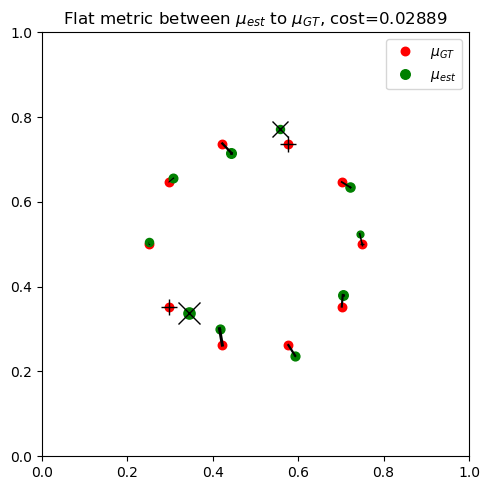

In [5]:
UOT_plot.plot_points_sources_uot(x, y, a, b, bounds, uot_out)